In [15]:
 # Load packages
from igraph import *
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import the functions
from ipynb.fs.full.SIR_DMP import SIR_DMP
from ipynb.fs.full.SIR_EXDMP import SIR_EXDMP,calculate_gamma_exponential
from ipynb.fs.full.SIR_PODMP import SIR_PODMP,calculate_gamma_power
from ipynb.fs.full.SIR_RADMP import SIR_RADMP,calculate_gamma_random
from ipynb.fs.full.SIR_SIGDMP import SIR_SIGDMP,calculate_gamma_sigmoidal

from ipynb.fs.full.SIR_MC import SIR_MC
from ipynb.fs.full.SIR_EXMC import SIR_EXMC, calculate_gamma_exponential
from ipynb.fs.full.SIR_POWMC import SIR_POWMC, calculate_gamma_power
from ipynb.fs.full.SIR_RAMC import SIR_RAMC, calculate_gamma_random
from ipynb.fs.full.SIR_SIGMC import SIR_SIGMC, calculate_gamma_sigmoidal

from ipynb.fs.full.SIR_ENSEMBLE import SIR_master_equation
from ipynb.fs.full.SIR_EXENSEMBLE import SIR_EXENSEMBLE,calculate_gamma_exponential
from ipynb.fs.full.SIR_RAENSEMBLE import SIR_RAENSEMBLE, calculate_gamma_random
from ipynb.fs.full.SIR_POENSEMBLE import SIR_POENSEMBLE, calculate_gamma_power
from ipynb.fs.full.SIR_SIGENSEMBLE import SIR_SIGENSEMBLE, calculate_gamma_sigmoidal

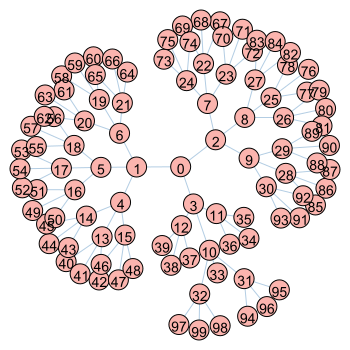

In [16]:
# Create a tree network using igraph method
G = Graph.Tree(100,3)


G.vs["name"] = [str(i) for i in range(len(G.vs))]

#transforming to dataframe
g = pd.DataFrame({'source': [x for e in G.es for x in (e.source, e.target)],
                  'target': [x for e in G.es for x in (e.target, e.source)]})
#plotting
p_style = {"bbox": (350, 350), "vertex_color": "#FBB4AE", "edge_color": "#B3CDE3"}
plot(G, layout=G.layout("kk"), vertex_label=G.vs["name"], **p_style)

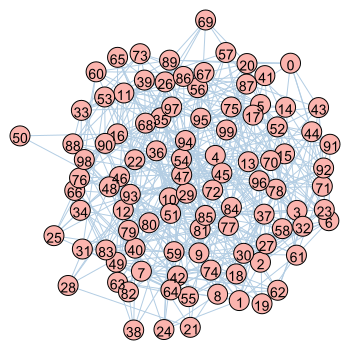

In [17]:
# Create a tree network using igraph method
G = Graph.Erdos_Renyi(n = 100, p = 0.1, directed = False)


G.vs["name"] = [str(i) for i in range(len(G.vs))]

#transforming to dataframe
g = pd.DataFrame({'source': [x for e in G.es for x in (e.source, e.target)],
                  'target': [x for e in G.es for x in (e.target, e.source)]})
#plotting
p_style = {"bbox": (350, 350), "vertex_color": "#FBB4AE", "edge_color": "#B3CDE3"}
plot(G, layout=G.layout("kk"), vertex_label=G.vs["name"], **p_style)

In [18]:
# Parameters
# Transmission rate
beta = 0.1
# Recovery rate
gamma = 0.1
#Time 
T = 50
#Initial probability for infected node
p0 = pd.DataFrame({'node': g['source'].unique(), 'prob': 0})
p0.loc[p0['node'].isin([1]), 'prob'] = 0.6

In [13]:
mrg_sDMP, mrg_iDMP,mrg_rDMP,_,_ = SIR_DMP(g, p0, beta, gamma, T)
mrg_sRADMP, mrg_iRADMP,mrg_rRADMP,_,_ = SIR_RADMP(g, p0, beta, T)
mrg_sPODMP, mrg_iPODMP,mrg_rPODMP,_,_ = SIR_PODMP(g, p0, beta, T)
mrg_sEXDMP, mrg_iEXDMP,mrg_rEXDMP,_,_ = SIR_EXDMP(g, p0, beta, T)
mrg_sSIGDMP, mrg_iSIGDMP,mrg_rSIGDMP,_,_ = SIR_SIGDMP(g, p0, beta, T)

mrg_sENSEMBLE, mrg_iENSEMBLE, mrg_rENSEMBLE = SIR_master_equation(g, p0, beta, gamma, T)
mrg_sEXENSEMBLE, mrg_iEXENSEMBLE, mrg_rEXENSEMBLE = SIR_EXENSEMBLE(g, p0, beta, T)
mrg_sRAENSEMBLE, mrg_iRAENSEMBLE, mrg_rRAENSEMBLE = SIR_RAENSEMBLE(g, p0, beta, T)
mrg_sPOENSEMBLE, mrg_iPOENSEMBLE, mrg_rPOENSEMBLE = SIR_POENSEMBLE(g, p0, beta, T)
mrg_sSIGENSEMBLE, mrg_iSIGENSEMBLE, mrg_rSIGENSEMBLE = SIR_SIGENSEMBLE(g, p0, beta, T)


mrg_sMC, mrg_iMC, mrg_rMC = SIR_MC(g, p0, beta, gamma, T, 100000)
# mrg_sRAMC, mrg_iRAMC, mrg_rRAMC = SIR_RAMC(g, p0, beta, T, 100000)
# mrg_sEXMC, mrg_iEXMC, mrg_rEXMC = SIR_EXMC(g, p0, beta, T, 100000)
# mrg_sPOWMC, mrg_iPOWMC, mrg_rMC = SIR_POWMC(g, p0, beta, T, 100000)
# mrg_sSIGMC, mrg_iSIGMC, mrg_rSIGMC = SIR_SIGMC(g, p0, beta, T, 100000)

RADMP Runtime:   0.33 seconds
PODMP Runtime:   0.5 seconds
EXDMP Runtime:   0.4 seconds
SIGDMP Runtime:   0.41 seconds
EXENSEMBLE Runtime:   0.21 seconds
RAENSEMBLE Runtime:   0.16 seconds
POENSEMBLE Runtime:   0.23 seconds
SIGENSEMBLE Runtime:   0.19 seconds


RADMP Runtime:   0.04 seconds
RAENSEMBLE Runtime:   0.02 seconds
RAMC Runtime:   495.19 seconds
RADMP Runtime:   0.04 seconds
RAENSEMBLE Runtime:   0.02 seconds
RAMC Runtime:   1057.55 seconds
RADMP Runtime:   0.07 seconds
RAENSEMBLE Runtime:   0.04 seconds
RAMC Runtime:   2077.38 seconds
RADMP Runtime:   0.16 seconds
RAENSEMBLE Runtime:   0.1 seconds
RAMC Runtime:   4183.15 seconds
RADMP Runtime:   0.32 seconds
RAENSEMBLE Runtime:   0.26 seconds
RAMC Runtime:   8369.26 seconds


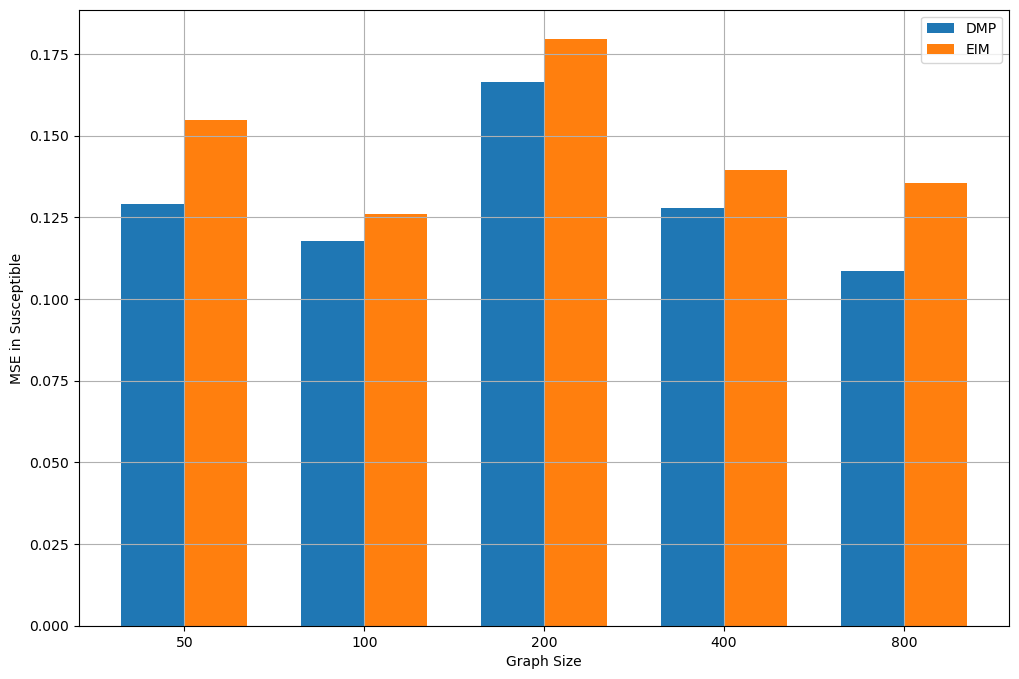

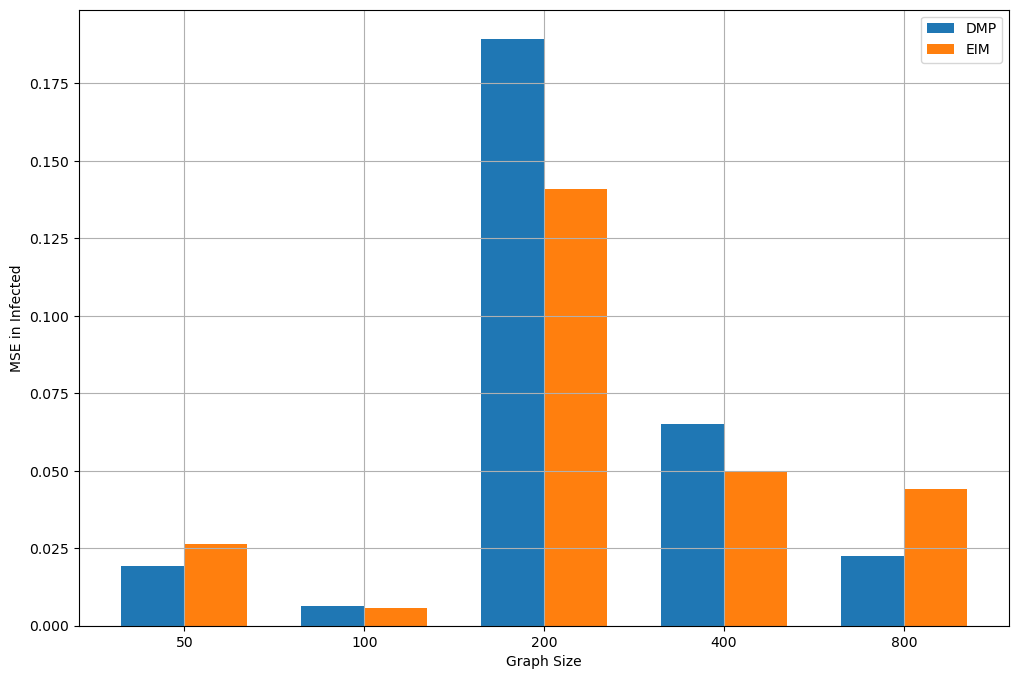

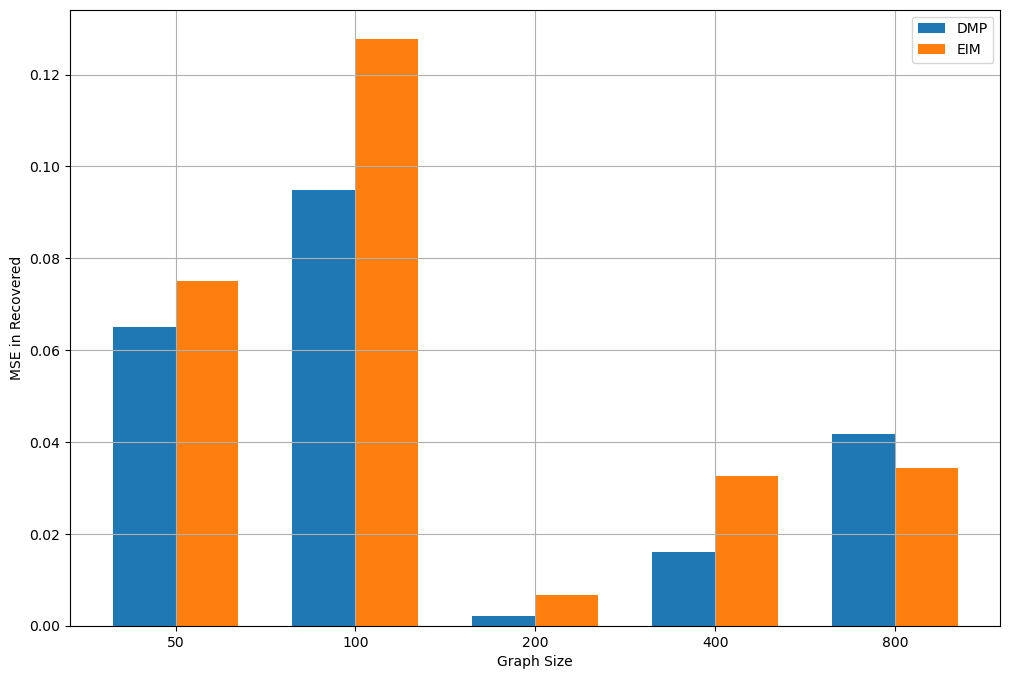

In [4]:
# Define parameters
sizes = [50, 100, 200, 400, 800]
beta = 0.3
gamma = 0.3
T = 10
num_simulations = 100000

# Store MSE results
mse_s_dmp_all = []
mse_i_dmp_all = []
mse_r_dmp_all = []
mse_s_me_all = []
mse_i_me_all = []
mse_r_me_all = []

for size in sizes:
    # Generate Barabási-Albert graph
    G = Graph.Barabasi(n=size, m=3, directed=False)
    G.vs["name"] = [str(i) for i in range(len(G.vs))]
    
    # Transform to DataFrame
    g = pd.DataFrame({'source': [x for e in G.es for x in (e.source, e.target)],
                      'target': [x for e in G.es for x in (e.target, e.source)]})

    # Create p0 for the current graph
    p0 = pd.DataFrame({'node': g['source'].unique(), 'prob': 0})
    p0.loc[p0['node'].isin([1]), 'prob'] = 0.4
    
    # Run all models
    mrg_s_dmp, mrg_i_dmp, mrg_r_dmp, _,_ = SIR_RADMP(g, p0, beta, T)
    mrg_s_me, mrg_i_me, mrg_r_me = SIR_RAENSEMBLE(g, p0, beta, T)
    mrg_s_mc, mrg_i_mc, mrg_r_mc = SIR_RAMC(g, p0, beta, T, num_simulations)

    # Compute MSE against Monte Carlo results
    mse_s_dmp = np.mean((mrg_s_dmp - mrg_s_mc) ** 2)
    mse_i_dmp = np.mean((mrg_i_dmp - mrg_i_mc) ** 2)
    mse_r_dmp = np.mean((mrg_r_dmp - mrg_r_mc) ** 2)

    mse_s_me = np.mean((mrg_s_me - mrg_s_mc) ** 2)
    mse_i_me = np.mean((mrg_i_me - mrg_i_mc) ** 2)
    mse_r_me = np.mean((mrg_r_me - mrg_r_mc) ** 2)

    mse_s_dmp_all.append(mse_s_dmp)
    mse_i_dmp_all.append(mse_i_dmp)
    mse_r_dmp_all.append(mse_r_dmp)
    mse_s_me_all.append(mse_s_me)
    mse_i_me_all.append(mse_i_me)
    mse_r_me_all.append(mse_r_me)

# Plot the MAE for different graph sizes
x = np.arange(len(sizes))
width = 0.35

# Plot MAE in Susceptible
plt.figure(figsize=(12, 8))
plt.bar(x - width/2, mse_s_dmp_all, width, label='DMP')
plt.bar(x + width/2, mse_s_me_all, width, label='EIM')
plt.xlabel('Graph Size')
plt.ylabel('MSE in Susceptible')
plt.xticks(x, sizes)
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/abbau/Downloads/MSEser.pdf', format='pdf',bbox_inches="tight")
plt.show()

# Plot MAE in Infected
plt.figure(figsize=(12, 8))
plt.bar(x - width/2, mse_i_dmp_all, width, label='DMP')
plt.bar(x + width/2, mse_i_me_all, width, label='EIM')
plt.xlabel('Graph Size')
plt.ylabel('MSE in Infected')
plt.xticks(x, sizes)
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/abbau/Downloads/MSEier.pdf', format='pdf',bbox_inches="tight")
plt.show()

# Plot MAE in Recovered
plt.figure(figsize=(12, 8))
plt.bar(x - width/2, mse_r_dmp_all, width, label='DMP')
plt.bar(x + width/2, mse_r_me_all, width, label='EIM')
plt.xlabel('Graph Size')
plt.ylabel('MSE in Recovered')
plt.xticks(x, sizes)
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/abbau/Downloads/MSErer.pdf', format='pdf',bbox_inches="tight")
plt.show()


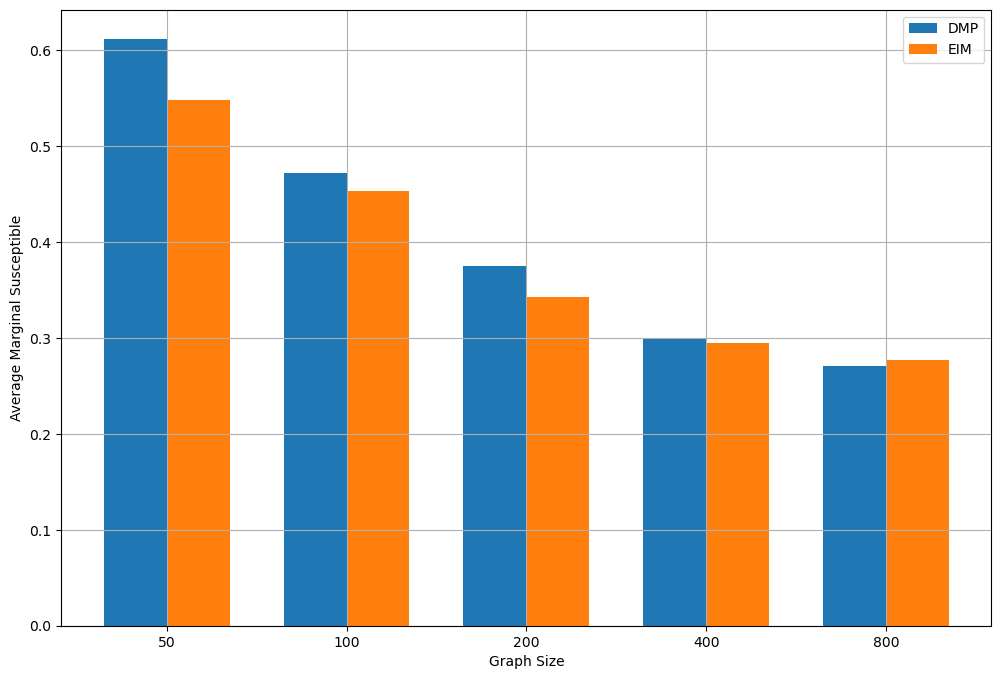

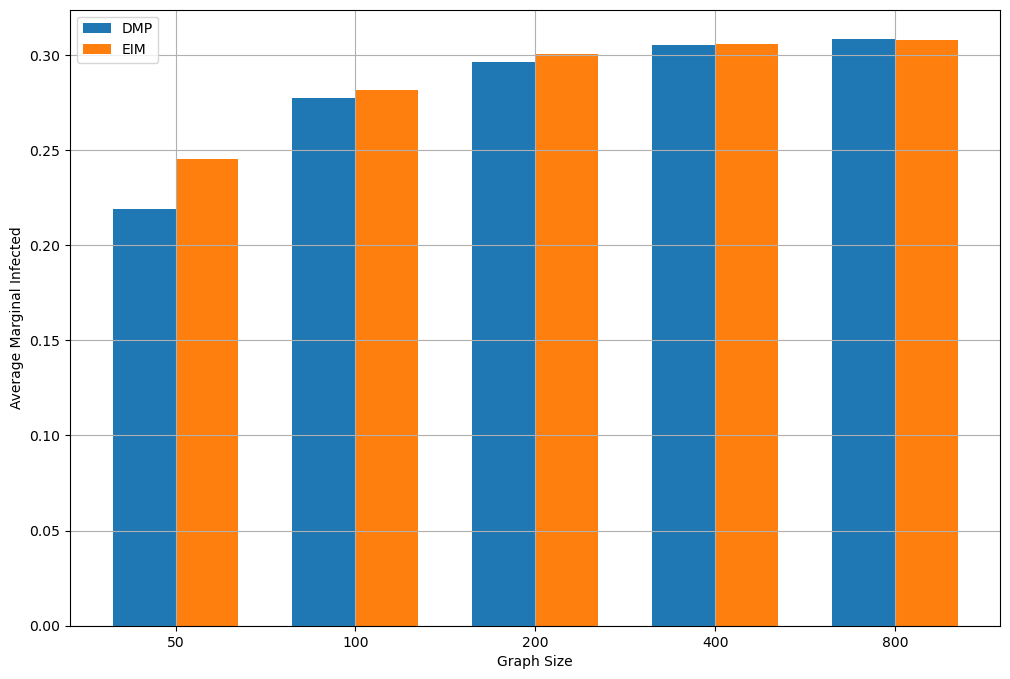

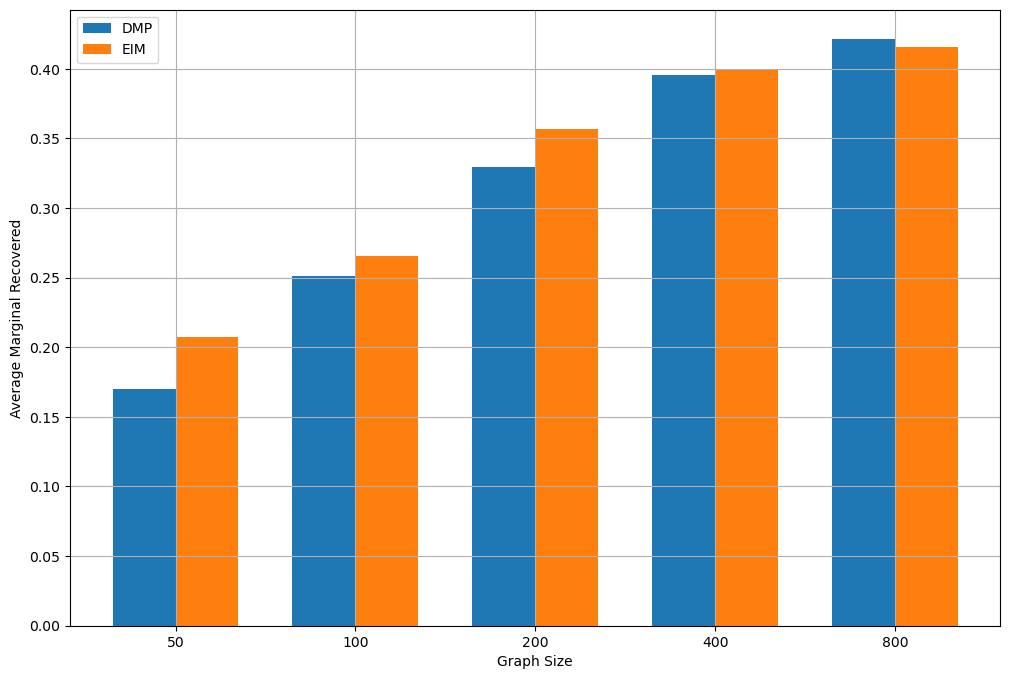

In [29]:
# Define parameters
sizes = [50, 100, 200, 400, 800]
beta = 0.3
gamma = 0.3
T = 10
num_simulations = 100000

# Store average marginals results
avg_mrg_s_dmp_all = []
avg_mrg_i_dmp_all = []
avg_mrg_r_dmp_all = []
avg_mrg_s_me_all = []
avg_mrg_i_me_all = []
avg_mrg_r_me_all = []

for size in sizes:
    # Generate Barabási-Albert graph
    G = Graph.Erdos_Renyi(n=size, p=0.1, directed=False)
    G.vs["name"] = [str(i) for i in range(len(G.vs))]
    
    # Transform to DataFrame
    g = pd.DataFrame({'source': [x for e in G.es for x in (e.source, e.target)],
                      'target': [x for e in G.es for x in (e.target, e.source)]})

    # Create p0 for the current graph
    # Create p0 for the current graph
    p0 = pd.DataFrame({'node': g['source'].unique(), 'prob': 0})
    p0.loc[p0['node'].isin([1]), 'prob'] = 0.4
    
    # Run models
    mrg_s_dmp, mrg_i_dmp, mrg_r_dmp ,_ ,_ = SIR_DMP(g, p0, beta, gamma, T)
    mrg_s_me, mrg_i_me, mrg_r_me = SIR_master_equation(g, p0, beta, gamma, T)

    # Compute average marginals over time
    avg_mrg_s_dmp = np.mean(mrg_s_dmp, axis=1).mean()
    avg_mrg_i_dmp = np.mean(mrg_i_dmp, axis=1).mean()
    avg_mrg_r_dmp = np.mean(mrg_r_dmp, axis=1).mean()
    
    avg_mrg_s_me = np.mean(mrg_s_me, axis=1).mean()
    avg_mrg_i_me = np.mean(mrg_i_me, axis=1).mean()
    avg_mrg_r_me = np.mean(mrg_r_me, axis=1).mean()

    avg_mrg_s_dmp_all.append(avg_mrg_s_dmp)
    avg_mrg_i_dmp_all.append(avg_mrg_i_dmp)
    avg_mrg_r_dmp_all.append(avg_mrg_r_dmp)
    avg_mrg_s_me_all.append(avg_mrg_s_me)
    avg_mrg_i_me_all.append(avg_mrg_i_me)
    avg_mrg_r_me_all.append(avg_mrg_r_me)

# Plot the average marginals for different graph sizes
x = np.arange(len(sizes))
width = 0.35

# Plot Marginal in Susceptible
plt.figure(figsize=(12, 8))
plt.bar(x - width/2, avg_mrg_s_dmp_all, width, label='DMP')
plt.bar(x + width/2, avg_mrg_s_me_all, width, label='EIM')
plt.xlabel('Graph Size')
plt.ylabel('Average Marginal Susceptible')
plt.xticks(x, sizes)
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/abbau/Downloads/Marginalse.pdf', format='pdf',bbox_inches="tight")
plt.show()

# Plot Marginal in Infected
plt.figure(figsize=(12, 8))
plt.bar(x - width/2, avg_mrg_i_dmp_all, width, label='DMP')
plt.bar(x + width/2, avg_mrg_i_me_all, width, label='EIM')
plt.xlabel('Graph Size')
plt.ylabel('Average Marginal Infected')
plt.xticks(x, sizes)
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/abbau/Downloads/Marginalie.pdf', format='pdf',bbox_inches="tight")
plt.show()

# Plot Marginal in Recovered
plt.figure(figsize=(12, 8))
plt.bar(x - width/2, avg_mrg_r_dmp_all, width, label='DMP')
plt.bar(x + width/2, avg_mrg_r_me_all, width, label='EIM')
plt.xlabel('Graph Size')
plt.ylabel('Average Marginal Recovered')
plt.xticks(x, sizes)
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/abbau/Downloads/Marginalre.pdf', format='pdf',bbox_inches="tight")
plt.show()

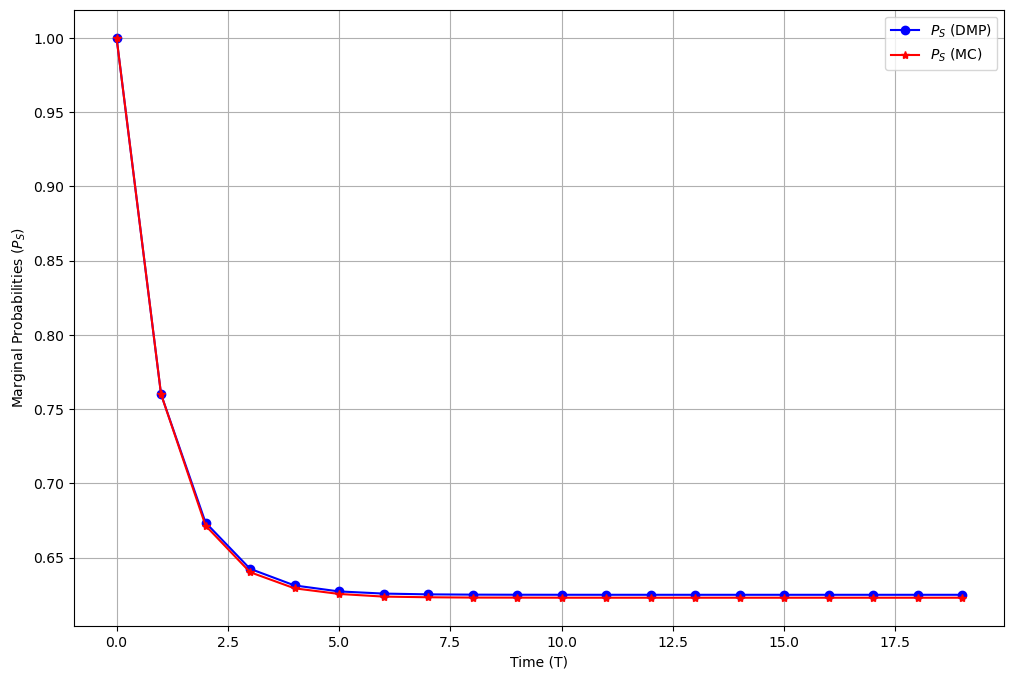

In [6]:
plt.figure(figsize=(12, 8))
time_steps=np.arange(T)

plt.plot(time_steps, mrg_sDMP[:,0], 'b-', label='$P_S$ (DMP)', marker='o')
#plt.plot(time_steps, mrg_iDMP[:,0], 'r--', label='$P_I$ (DMP)', marker='o')
#plt.plot(time_steps, mrg_rDMP[:,0], 'g-.', label='$P_R$ (DMP)', marker='o')

plt.plot(time_steps, mrg_sMC[:,0], 'r-', label='$P_S$ (MC)', marker='*')
#plt.plot(time_steps, mrg_iMC[:,0], 'g--', label='$P_I$ (MC)',marker='*')
#plt.plot(time_steps, mrg_rMC[:,0], 'b-.', label='$P_R$ (MC)',marker='*')

plt.xlabel('Time (T)')
plt.ylabel('Marginal Probabilities ($P_S$)')
plt.legend()
plt.grid(True)
plt.show()

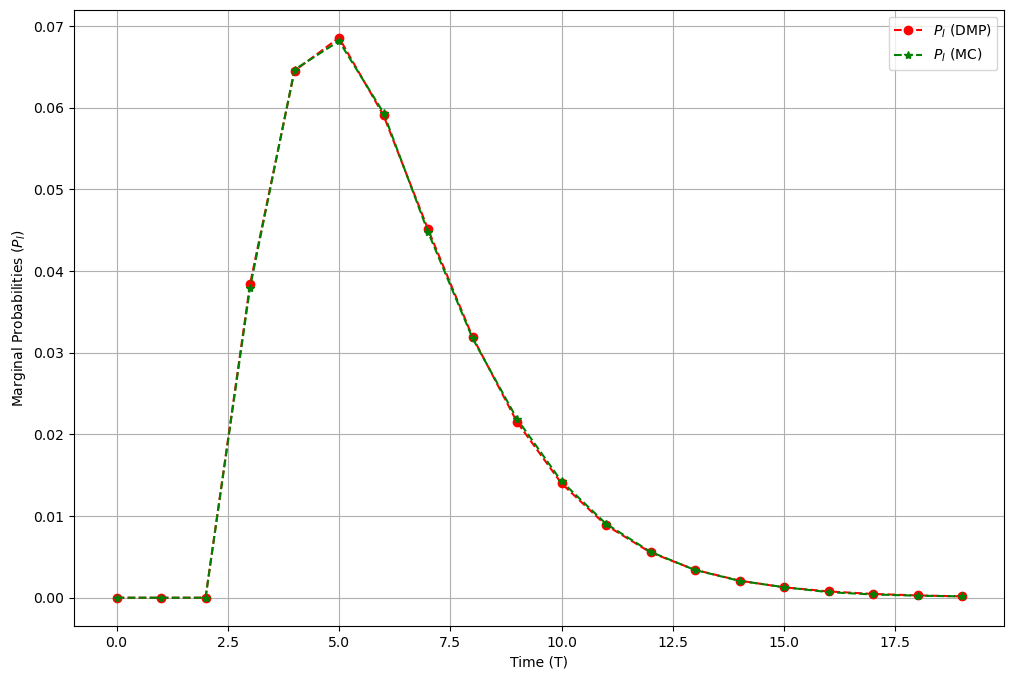

In [7]:
plt.figure(figsize=(12, 8))
time_steps=np.arange(T)

#plt.plot(time_steps, mrg_sDMP[:,0], 'b-', label='$P_S$ (DMP)', marker='o')
plt.plot(time_steps, mrg_iDMP[:,7], 'r--', label='$P_I$ (DMP)', marker='o')
#plt.plot(time_steps, mrg_rDMP[:,0], 'g-.', label='$P_R$ (DMP)', marker='o')

#plt.plot(time_steps, mrg_sMC[:,0], 'r-', label='$P_S$ (MC)', marker='*')
plt.plot(time_steps, mrg_iMC[:,7], 'g--', label='$P_I$ (MC)',marker='*')
#plt.plot(time_steps, mrg_rMC[:,0], 'b-.', label='$P_R$ (MC)',marker='*')

plt.xlabel('Time (T)')
plt.ylabel('Marginal Probabilities ($P_I$)')
plt.legend()
plt.grid(True)
plt.show()

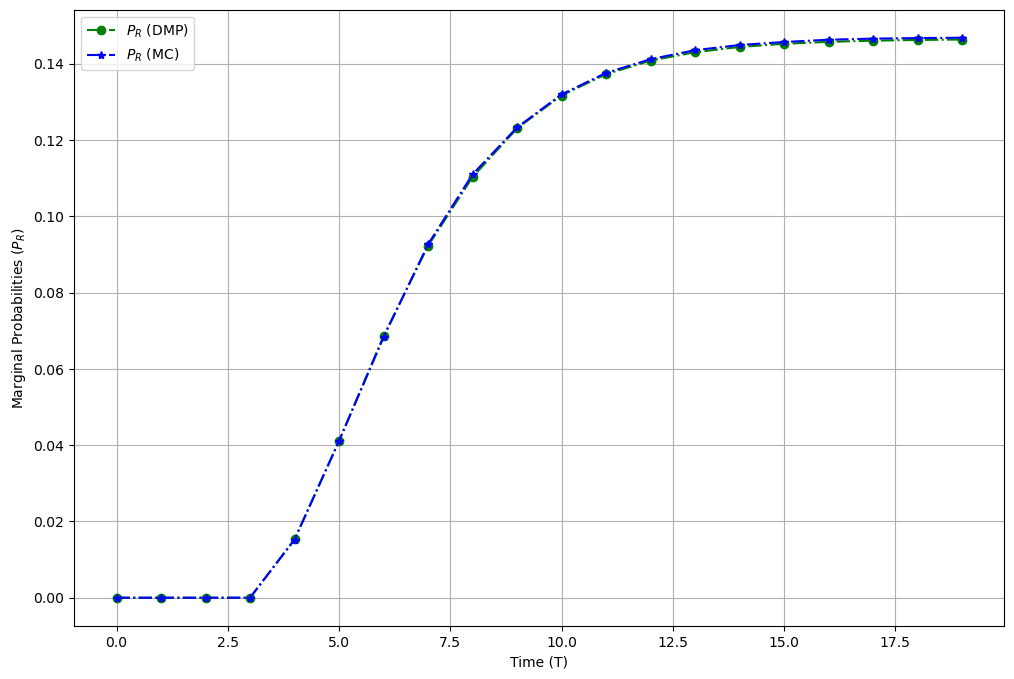

In [8]:
plt.figure(figsize=(12, 8))
time_steps=np.arange(T)

#plt.plot(time_steps, mrg_sDMP[:,0], 'b-', label='$P_S$ (DMP)', marker='o')
#plt.plot(time_steps, mrg_iDMP[:,0], 'r--', label='$P_I$ (DMP)', marker='o')
plt.plot(time_steps, mrg_rDMP[:,7], 'g-.', label='$P_R$ (DMP)', marker='o')

#plt.plot(time_steps, mrg_sMC[:,0], 'r-', label='$P_S$ (MC)', marker='*')
#plt.plot(time_steps, mrg_iMC[:,0], 'g--', label='$P_I$ (MC)',marker='*')
plt.plot(time_steps, mrg_rMC[:,7], 'b-.', label='$P_R$ (MC)',marker='*')

plt.xlabel('Time (T)')
plt.ylabel('Marginal Probabilities ($P_R$)')
plt.legend()
plt.grid(True)
plt.show()

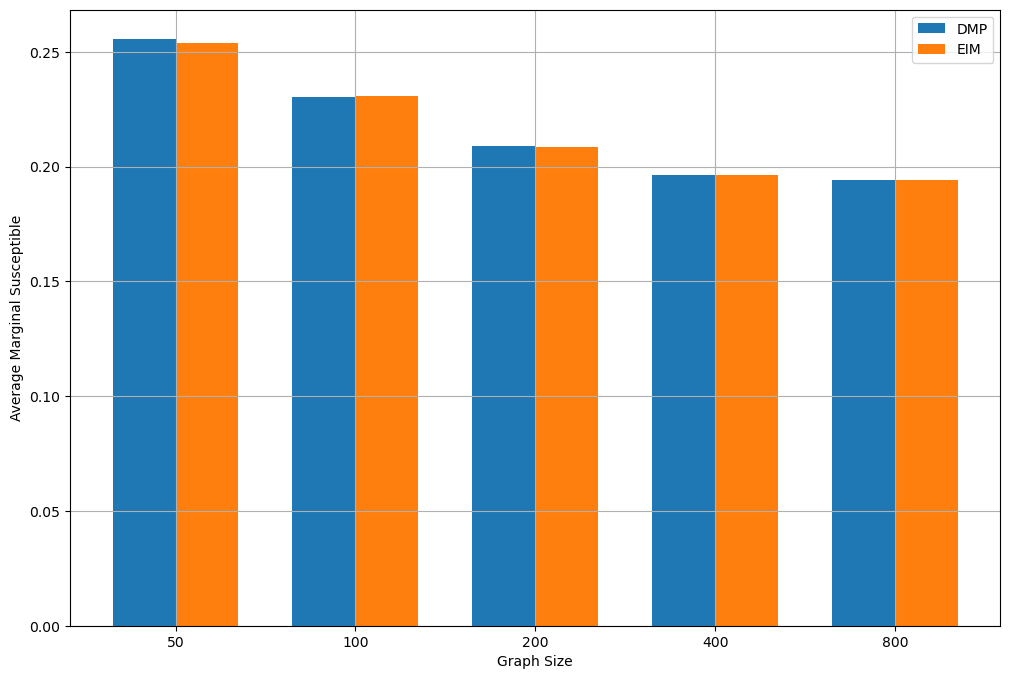

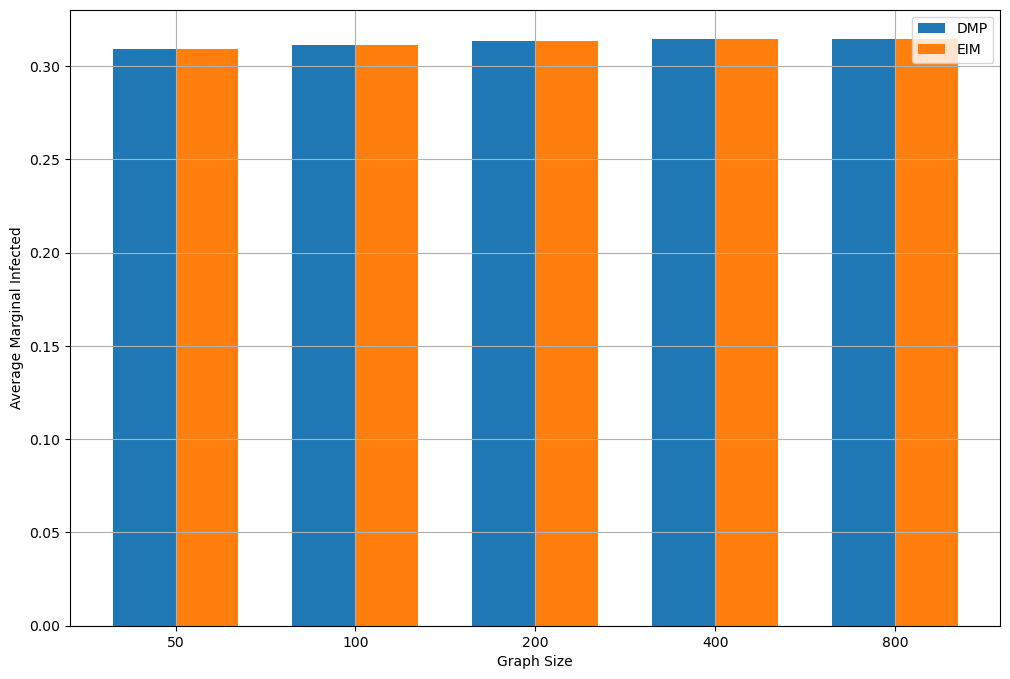

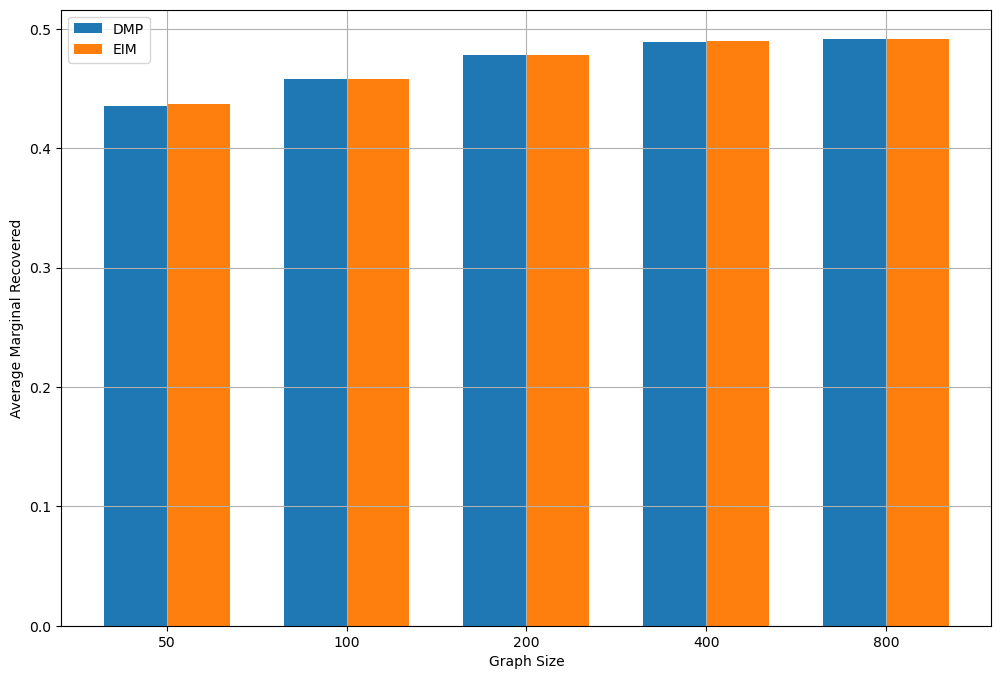

In [21]:
# Define parameters
sizes = [50, 100, 200, 400, 800]
beta = 0.3
gamma = 0.3
T = 10
num_simulations = 100

# Store average marginals results
avg_mrg_s_dmp_all = []
avg_mrg_i_dmp_all = []
avg_mrg_r_dmp_all = []
avg_mrg_s_me_all = []
avg_mrg_i_me_all = []
avg_mrg_r_me_all = []

for size in sizes:
    mrg_s_dmp_list = []
    mrg_i_dmp_list = []
    mrg_r_dmp_list = []
    mrg_s_me_list = []
    mrg_i_me_list = []
    mrg_r_me_list = []
    
    for _ in range(num_simulations):
        # Generate Barabási-Albert graph
        G = Graph.Erdos_Renyi(n=size, p=0.5, directed=False)
        G.vs["name"] = [str(i) for i in range(len(G.vs))]

        # Transform to DataFrame
        g = pd.DataFrame({'source': [x for e in G.es for x in (e.source, e.target)],
                          'target': [x for e in G.es for x in (e.target, e.source)]})

        # Create p0 for the current graph
        p0 = pd.DataFrame({'node': g['source'].unique(), 'prob': 0})
        p0.loc[p0['node'].isin([1]), 'prob'] = 0.4

        # Run models
        mrg_s_dmp, mrg_i_dmp, mrg_r_dmp ,_ ,_ = SIR_DMP(g, p0, beta, gamma, T)
        mrg_s_me, mrg_i_me, mrg_r_me = SIR_master_equation(g, p0, beta, gamma, T)

        # Collect results
        mrg_s_dmp_list.append(np.mean(mrg_s_dmp, axis=1).mean())
        mrg_i_dmp_list.append(np.mean(mrg_i_dmp, axis=1).mean())
        mrg_r_dmp_list.append(np.mean(mrg_r_dmp, axis=1).mean())
        mrg_s_me_list.append(np.mean(mrg_s_me, axis=1).mean())
        mrg_i_me_list.append(np.mean(mrg_i_me, axis=1).mean())
        mrg_r_me_list.append(np.mean(mrg_r_me, axis=1).mean())

    # Compute average marginals over all simulations
    avg_mrg_s_dmp_all.append(np.mean(mrg_s_dmp_list))
    avg_mrg_i_dmp_all.append(np.mean(mrg_i_dmp_list))
    avg_mrg_r_dmp_all.append(np.mean(mrg_r_dmp_list))
    avg_mrg_s_me_all.append(np.mean(mrg_s_me_list))
    avg_mrg_i_me_all.append(np.mean(mrg_i_me_list))
    avg_mrg_r_me_all.append(np.mean(mrg_r_me_list))

# Plot the average marginals for different graph sizes
x = np.arange(len(sizes))
width = 0.35

# Plot Marginal in Susceptible
plt.figure(figsize=(12, 8))
plt.bar(x - width/2, avg_mrg_s_dmp_all, width, label='DMP')
plt.bar(x + width/2, avg_mrg_s_me_all, width, label='EIM')
plt.xlabel('Graph Size')
plt.ylabel('Average Marginal Susceptible')
plt.xticks(x, sizes)
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/abbau/Downloads/Marginalse.pdf', format='pdf',bbox_inches="tight")
plt.show()

# Plot Marginal in Infected
plt.figure(figsize=(12, 8))
plt.bar(x - width/2, avg_mrg_i_dmp_all, width, label='DMP')
plt.bar(x + width/2, avg_mrg_i_me_all, width, label='EIM')
plt.xlabel('Graph Size')
plt.ylabel('Average Marginal Infected')
plt.xticks(x, sizes)
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/abbau/Downloads/Marginalie.pdf', format='pdf',bbox_inches="tight")
plt.show()

# Plot Marginal in Recovered
plt.figure(figsize=(12, 8))
plt.bar(x - width/2, avg_mrg_r_dmp_all, width, label='DMP')
plt.bar(x + width/2, avg_mrg_r_me_all, width, label='EIM')
plt.xlabel('Graph Size')
plt.ylabel('Average Marginal Recovered')
plt.xticks(x, sizes)
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/abbau/Downloads/Marginalre.pdf', format='pdf',bbox_inches="tight")
plt.show()


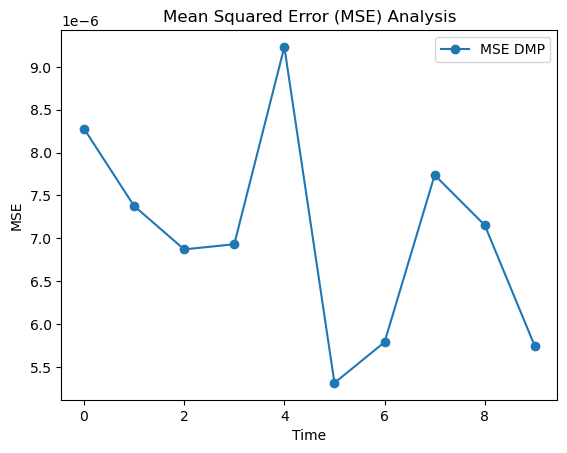

In [8]:
time_steps = np.arange(T)

# Calculate MSE for each pair of elements
mse_per_element_DMP = np.mean((mrg_iMC - mrg_iDMP)**2,axis=1)
#mse_per_element_ENSEMBLE = np.mean((mrg_iMC - mrg_iENSEMBLE)**2, axis=1)


# Plot the MSE values
plt.plot(time_steps, mse_per_element_DMP, label='MSE DMP', linestyle='-', marker='o')
#plt.plot(time_steps, mse_per_element_ENSEMBLE, label='MSE Ensemble', linestyle='--', marker='x')
plt.title('Mean Squared Error (MSE) Analysis')
plt.xlabel('Time')
plt.ylabel('MSE')
plt.legend()
plt.show()

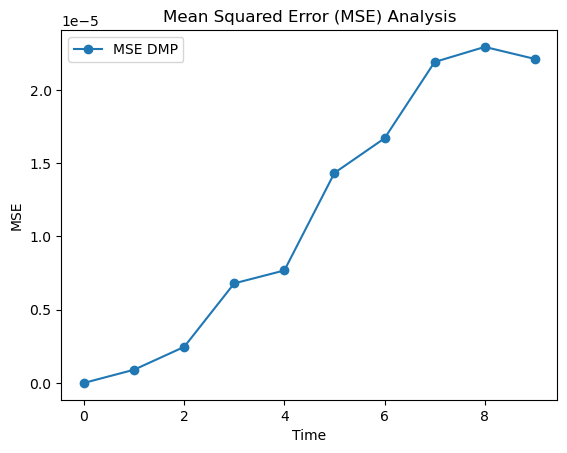

In [6]:
time_steps = np.arange(T)

# Calculate MSE for each pair of elements
mse_per_element_DMP = np.mean((mrg_rMC - mrg_rDMP)**2,axis=1)


# Plot the MSE values
plt.plot(time_steps, mse_per_element_DMP, label='MSE DMP', linestyle='-', marker='o')
plt.title('Mean Squared Error (MSE) Analysis')
plt.xlabel('Time')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [99]:
mse_per_element_DMP

array([1.44400000e-06, 1.94200000e-06, 3.63267580e-06, 5.48562211e-06,
       1.31269390e-05, 3.08737137e-05, 7.60830271e-05, 1.80381708e-04,
       3.23888990e-04, 5.37543153e-04])

In [100]:
mse_per_element_ENSEMBLE

array([1.44400000e-06, 1.94200000e-06, 1.57828333e-05, 6.70370118e-05,
       2.36093385e-04, 6.22028582e-04, 1.47202777e-03, 3.13042256e-03,
       5.80531269e-03, 9.95201173e-03])

In [104]:
# Calculate MSE for each pair of elements
mse_per_element_DMPr = np.mean((mrg_rMC - mrg_rDMP)**2,axis=1)
mse_per_element_ENSEMBLEr = np.mean((mrg_rMC - mrg_rENSEMBLE)**2, axis=1)

In [105]:
mse_per_element_DMPr

array([0.00000000e+00, 3.72100000e-06, 1.13260000e-05, 1.53453651e-05,
       2.85895263e-05, 3.61173713e-05, 3.57079132e-05, 3.74601550e-05,
       3.24580848e-05, 2.55064545e-05])

In [106]:
mse_per_element_ENSEMBLEr 

array([0.00000000e+00, 3.72100000e-06, 1.13260000e-05, 1.37657042e-05,
       2.06358040e-05, 1.73760859e-05, 8.97161331e-06, 1.41743739e-05,
       6.48655690e-05, 2.12140137e-04])

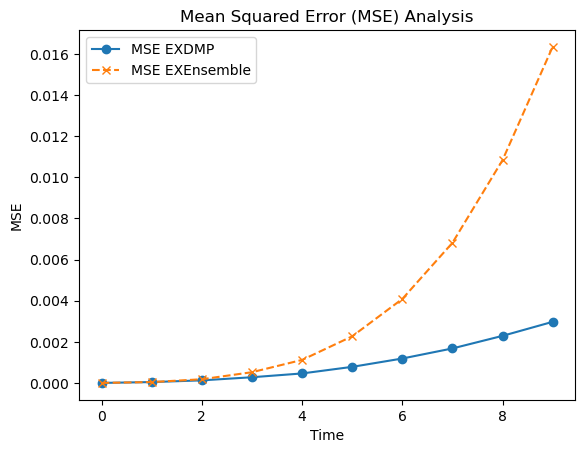

In [93]:
time_steps = np.arange(T)

# Calculate MSE for each pair of elements
mse_per_element_DMP = np.mean((mrg_iEXMC - mrg_iEXDMP)**2,axis=1)
mse_per_element_ENSEMBLE = np.mean((mrg_iEXMC - mrg_iEXENSEMBLE)**2, axis=1)


# Plot the MSE values
plt.plot(time_steps, mse_per_element_DMP, label='MSE EXDMP', linestyle='-', marker='o')
plt.plot(time_steps, mse_per_element_ENSEMBLE, label='MSE EXEnsemble', linestyle='--', marker='x')
plt.title('Mean Squared Error (MSE) Analysis')
plt.xlabel('Time')
plt.ylabel('MSE')
plt.legend()
plt.show()

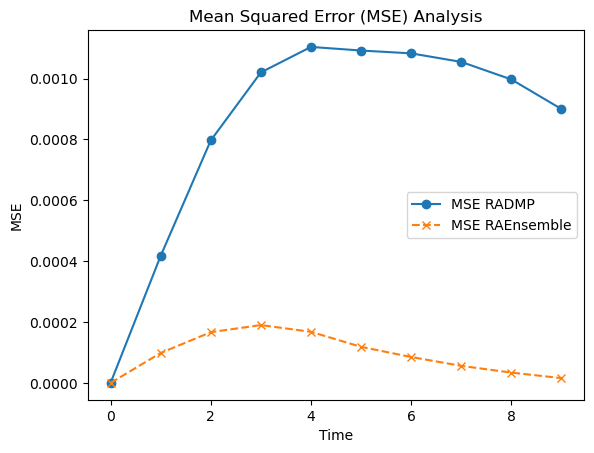

In [97]:
time_steps = np.arange(T)

# Calculate MSE for each pair of elements
mse_per_element_DMP = np.mean((mrg_iRAMC - mrg_iRADMP)**2,axis=1)
mse_per_element_ENSEMBLE = np.mean((mrg_iRAMC - mrg_iRAENSEMBLE)**2, axis=1)


# Plot the MSE values
plt.plot(time_steps, mse_per_element_DMP, label='MSE RADMP', linestyle='-', marker='o')
plt.plot(time_steps, mse_per_element_ENSEMBLE, label='MSE RAEnsemble', linestyle='--', marker='x')
plt.title('Mean Squared Error (MSE) Analysis')
plt.xlabel('Time')
plt.ylabel('MSE')
plt.legend()
plt.show()

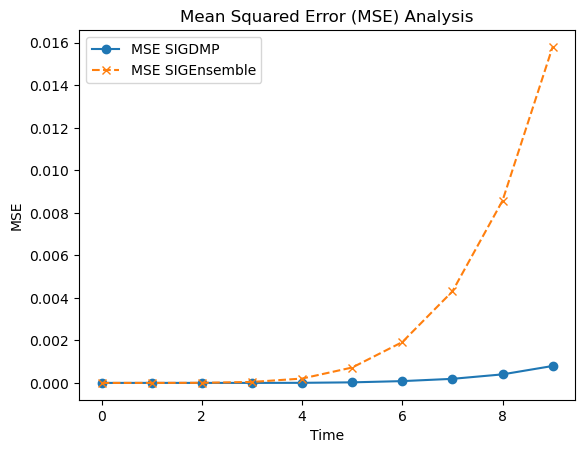

In [95]:
time_steps = np.arange(T)

# Calculate MSE for each pair of elements
mse_per_element_DMP = np.mean((mrg_iSIGMC - mrg_iSIGDMP)**2,axis=1)
mse_per_element_ENSEMBLE = np.mean((mrg_iSIGMC - mrg_iSIGENSEMBLE)**2, axis=1)


# Plot the MSE values
plt.plot(time_steps, mse_per_element_DMP, label='MSE SIGDMP', linestyle='-', marker='o')
plt.plot(time_steps, mse_per_element_ENSEMBLE, label='MSE SIGEnsemble', linestyle='--', marker='x')
plt.title('Mean Squared Error (MSE) Analysis')
plt.xlabel('Time')
plt.ylabel('MSE')
plt.legend()
plt.show()

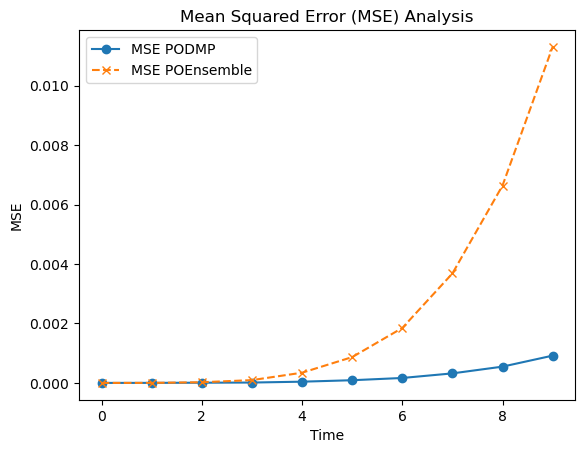

In [96]:
time_steps = np.arange(T)

# Calculate MSE for each pair of elements
mse_per_element_DMP = np.mean((mrg_iPOWMC - mrg_iPODMP)**2,axis=1)
mse_per_element_ENSEMBLE = np.mean((mrg_iPOWMC - mrg_iPOENSEMBLE)**2, axis=1)


# Plot the MSE values
plt.plot(time_steps, mse_per_element_DMP, label='MSE PODMP', linestyle='-', marker='o')
plt.plot(time_steps, mse_per_element_ENSEMBLE, label='MSE POEnsemble', linestyle='--', marker='x')
plt.title('Mean Squared Error (MSE) Analysis')
plt.xlabel('Time')
plt.ylabel('MSE')
plt.legend()
plt.show()

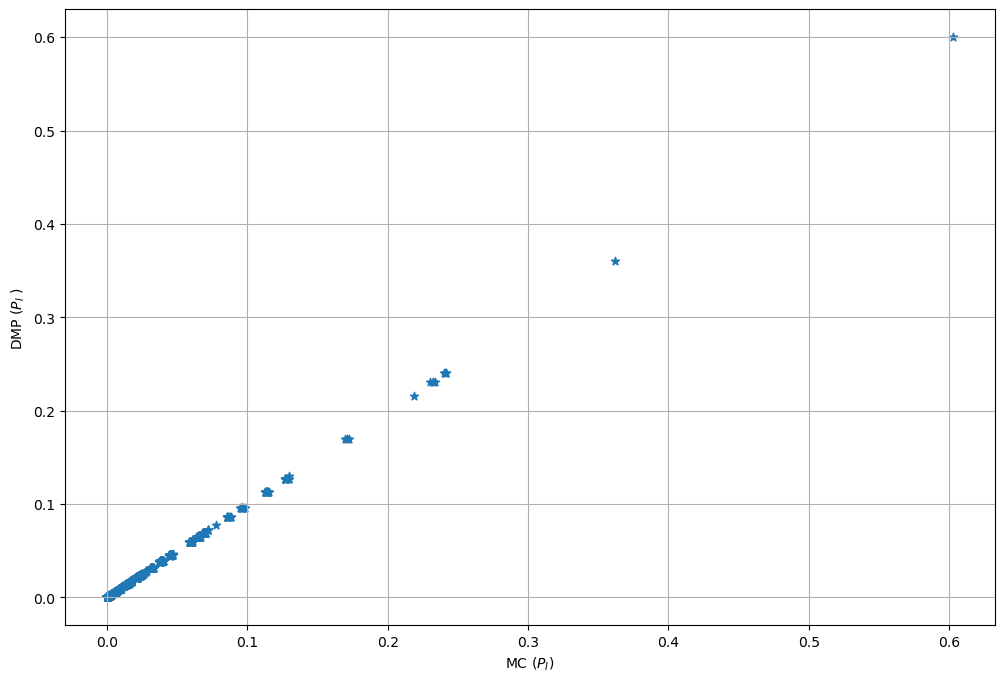

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
# Assuming mrg_iM and mrg_iE are already defined and have the same length
plt.scatter(mrg_iMC, mrg_iDMP, cmap='viridis', marker='*')

plt.xlabel('MC ($P_I$)')
plt.ylabel('DMP ($P_I$ )')
plt.grid(True)
plt.savefig('C:/Users/abbau/Downloads/PiMC.pdf', format='pdf',bbox_inches="tight")
plt.show()


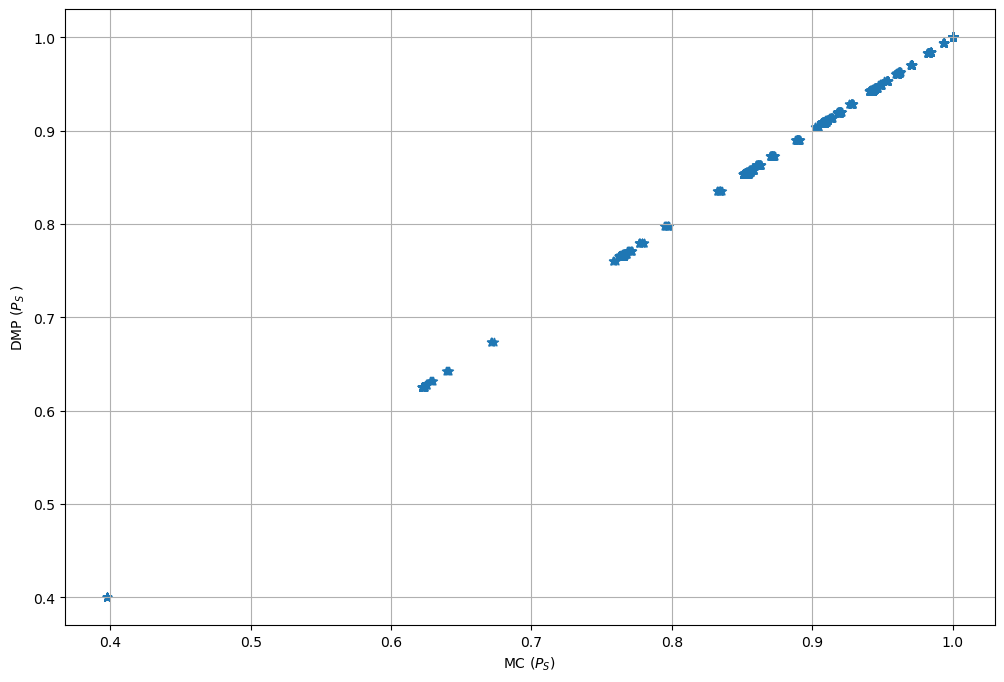

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

# Assuming mrg_iM and mrg_iE are already defined and have the same length
plt.scatter(mrg_sMC, mrg_sDMP, cmap='viridis', marker='*')
# or, if you prefer a line plot: plt.plot(mrg_iM, mrg_iE)

plt.xlabel('MC ($P_S$)')
plt.ylabel('DMP ($P_S$ )')
plt.grid(True)
plt.savefig('C:/Users/abbau/Downloads/PsMC.pdf', format='pdf',bbox_inches="tight")
plt.show()


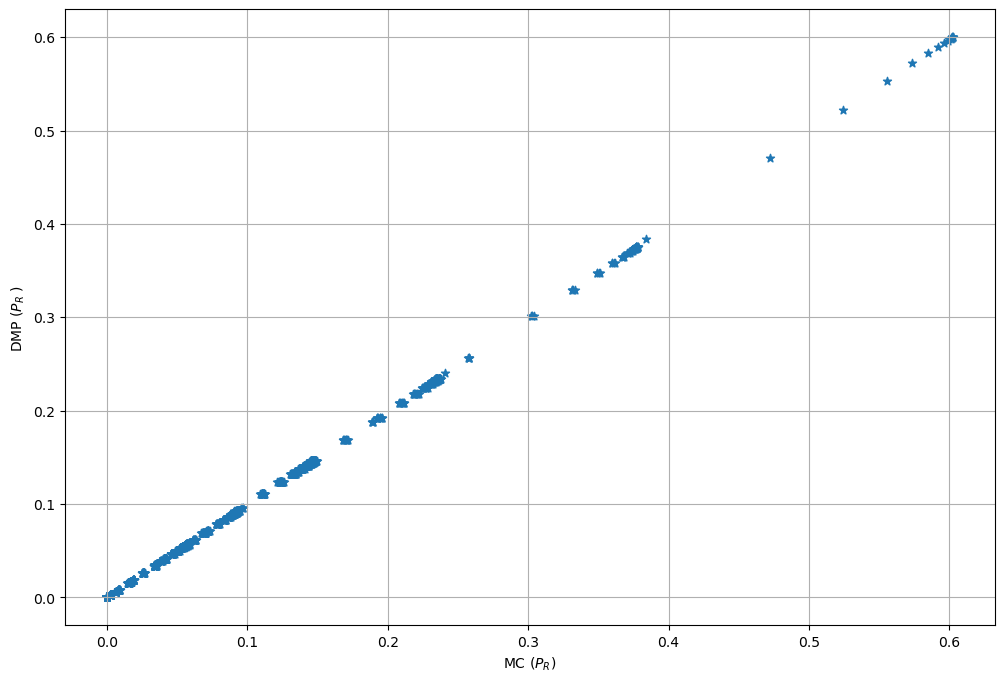

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

# Assuming mrg_iM and mrg_iE are already defined and have the same length
plt.scatter(mrg_rMC, mrg_rDMP, cmap='viridis', marker='*')
# or, if you prefer a line plot: plt.plot(mrg_iM, mrg_iE)

plt.xlabel('MC ($P_R$)')
plt.ylabel('DMP ($P_R$ )')
plt.grid(True)
plt.savefig('C:/Users/abbau/Downloads/PrMC.pdf', format='pdf',bbox_inches="tight")
plt.show()


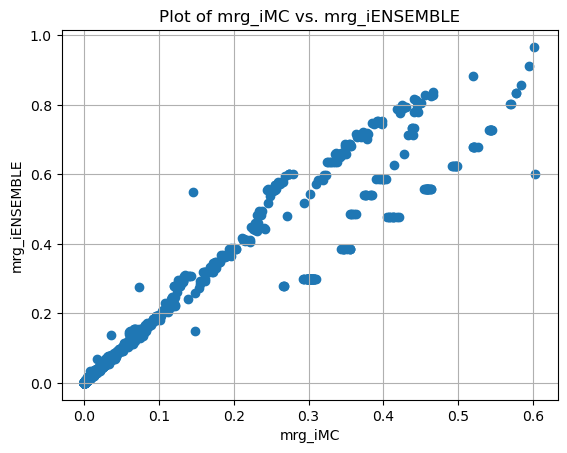

In [68]:
import matplotlib.pyplot as plt

# Assuming mrg_iM and mrg_iE are already defined and have the same length
plt.scatter(mrg_iMC, mrg_iENSEMBLE)
# or, if you prefer a line plot: plt.plot(mrg_iM, mrg_iE)

plt.title('Plot of mrg_iMC vs. mrg_iENSEMBLE')
plt.xlabel('mrg_iMC')
plt.ylabel('mrg_iENSEMBLE')
plt.grid(True)
plt.show()


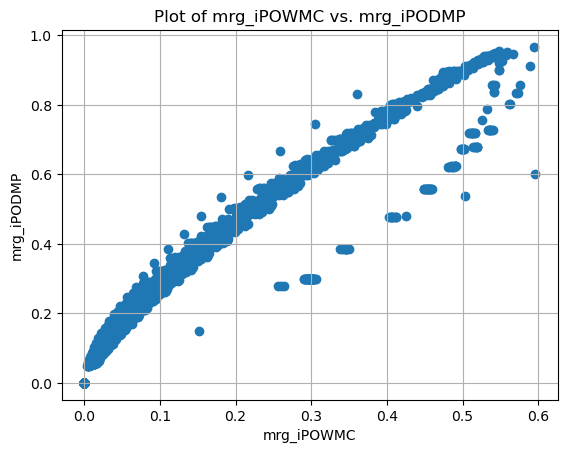

In [69]:
import matplotlib.pyplot as plt

# Assuming mrg_iM and mrg_iE are already defined and have the same length
plt.scatter(mrg_iPOWMC, mrg_iPODMP)
# or, if you prefer a line plot: plt.plot(mrg_iM, mrg_iE)

plt.title('Plot of mrg_iPOWMC vs. mrg_iPODMP')
plt.xlabel('mrg_iPOWMC')
plt.ylabel('mrg_iPODMP')
plt.grid(True)
plt.show()


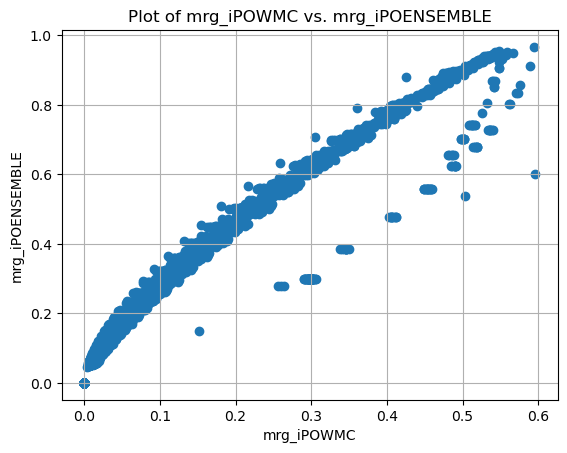

In [70]:
import matplotlib.pyplot as plt

# Assuming mrg_iM and mrg_iE are already defined and have the same length
plt.scatter(mrg_iPOWMC, mrg_iPOENSEMBLE)
# or, if you prefer a line plot: plt.plot(mrg_iM, mrg_iE)

plt.title('Plot of mrg_iPOWMC vs. mrg_iPOENSEMBLE')
plt.xlabel('mrg_iPOWMC')
plt.ylabel('mrg_iPOENSEMBLE')
plt.grid(True)
plt.show()


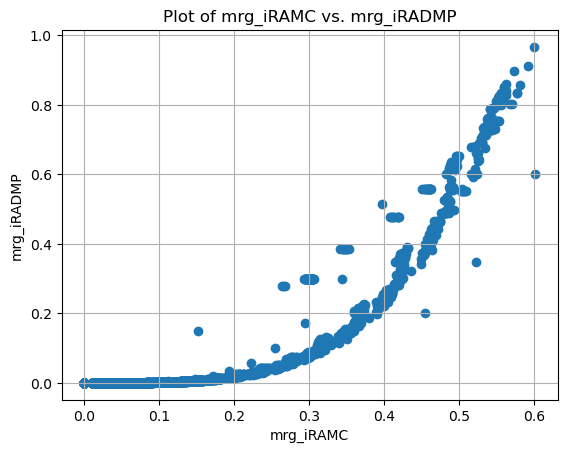

In [71]:
import matplotlib.pyplot as plt

# Assuming mrg_iM and mrg_iE are already defined and have the same length
plt.scatter(mrg_iRAMC, mrg_iRADMP)
# or, if you prefer a line plot: plt.plot(mrg_iM, mrg_iE)

plt.title('Plot of mrg_iRAMC vs. mrg_iRADMP')
plt.xlabel('mrg_iRAMC')
plt.ylabel('mrg_iRADMP')
plt.grid(True)
plt.show()


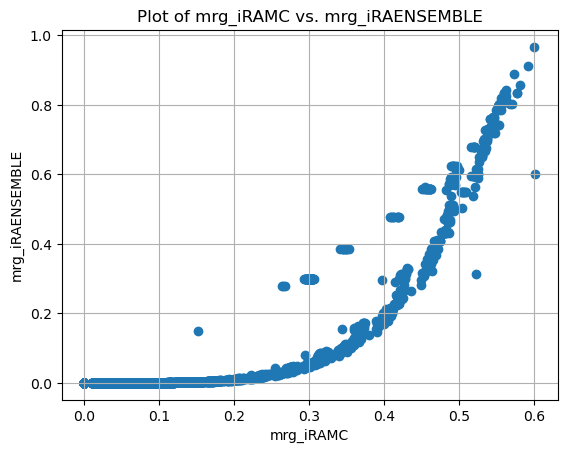

In [72]:
import matplotlib.pyplot as plt

# Assuming mrg_iM and mrg_iE are already defined and have the same length
plt.scatter(mrg_iRAMC, mrg_iRAENSEMBLE)
# or, if you prefer a line plot: plt.plot(mrg_iM, mrg_iE)

plt.title('Plot of mrg_iRAMC vs. mrg_iRAENSEMBLE')
plt.xlabel('mrg_iRAMC')
plt.ylabel('mrg_iRAENSEMBLE')
plt.grid(True)
plt.show()


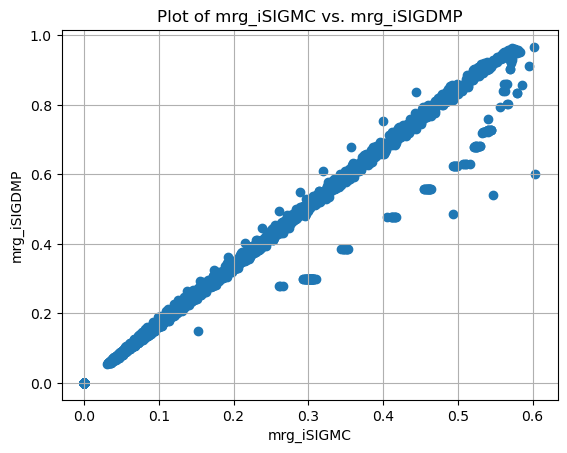

In [73]:
import matplotlib.pyplot as plt

# Assuming mrg_iM and mrg_iE are already defined and have the same length
plt.scatter(mrg_iSIGMC, mrg_iSIGDMP)

plt.title('Plot of mrg_iSIGMC vs. mrg_iSIGDMP')
plt.xlabel('mrg_iSIGMC')
plt.ylabel('mrg_iSIGDMP')
plt.grid(True)
plt.show()


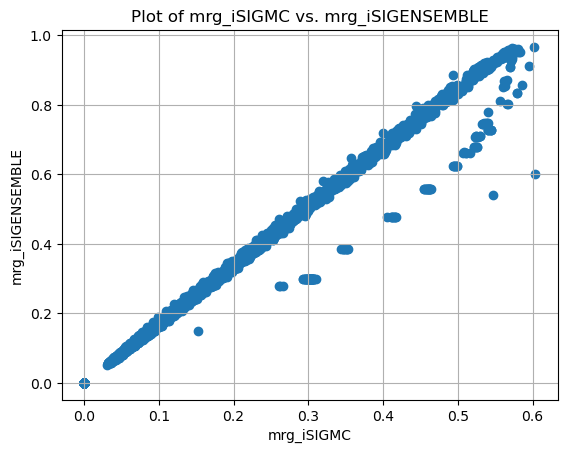

In [74]:
import matplotlib.pyplot as plt

# Assuming mrg_iM and mrg_iE are already defined and have the same length
plt.scatter(mrg_iSIGMC, mrg_iSIGENSEMBLE)
# or, if you prefer a line plot: plt.plot(mrg_iM, mrg_iE)

plt.title('Plot of mrg_iSIGMC vs. mrg_iSIGENSEMBLE')
plt.xlabel('mrg_iSIGMC')
plt.ylabel('mrg_iSIGENSEMBLE')
plt.grid(True)
plt.show()


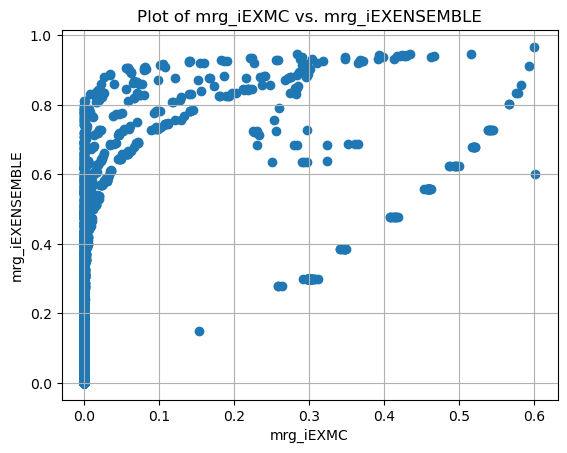

In [75]:
import matplotlib.pyplot as plt

# Assuming mrg_iM and mrg_iE are already defined and have the same length
plt.scatter(mrg_iEXMC, mrg_iEXENSEMBLE)
# or, if you prefer a line plot: plt.plot(mrg_iM, mrg_iE)

plt.title('Plot of mrg_iEXMC vs. mrg_iEXENSEMBLE')
plt.xlabel('mrg_iEXMC')
plt.ylabel('mrg_iEXENSEMBLE')
plt.grid(True)
plt.show()


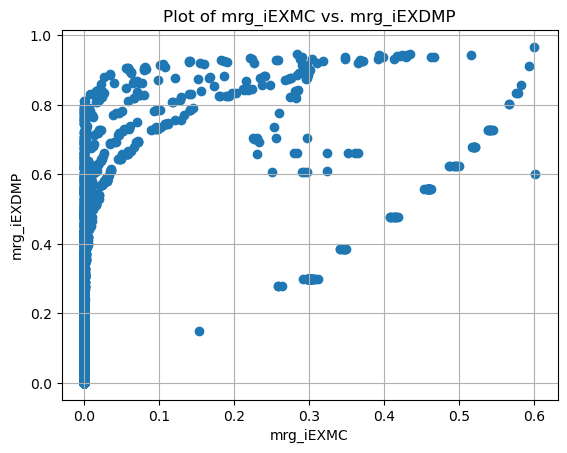

In [76]:
import matplotlib.pyplot as plt

# Assuming mrg_iM and mrg_iE are already defined and have the same length
plt.scatter(mrg_iEXMC, mrg_iEXDMP)
# or, if you prefer a line plot: plt.plot(mrg_iM, mrg_iE)

plt.title('Plot of mrg_iEXMC vs. mrg_iEXDMP')
plt.xlabel('mrg_iEXMC')
plt.ylabel('mrg_iEXDMP')
plt.grid(True)
plt.show()


In [53]:
std_dev_mrg_i = np.std(mrg_iM)
sem_mrg_i = std_dev_mrg_i / np.sqrt(10000)
std_dev_mrg_s = np.std(mrg_sM)
sem_mrg_s = std_dev_mrg_s / np.sqrt(10000)
std_dev_mrg_r = np.std(mrg_rM)
sem_mrg_r = std_dev_mrg_r / np.sqrt(10000)

In [54]:
sem_mrg_i,sem_mrg_r,sem_mrg_s

(0.00043949612102952624, 0.0006066226590776672, 0.0014451182277533036)

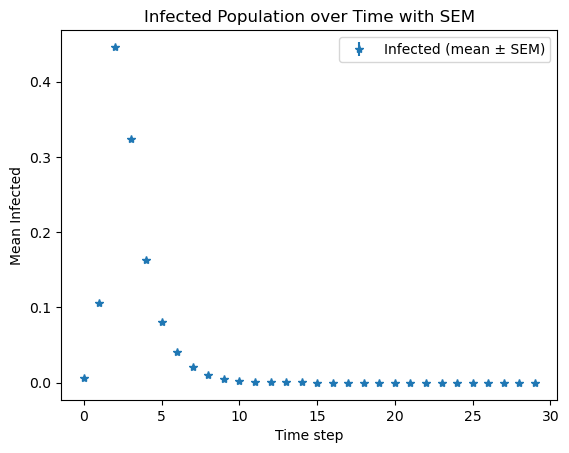

In [107]:
import matplotlib.pyplot as plt

# Assuming time_steps is a 1D array with the same length as sem_mrg_i
# and avg_mrg_i is the array of mean values for each time step
mean = np.mean(mrg_iM, axis=1)
plt.errorbar(time_steps, mean, yerr=sem_mrg_i, fmt='*', label='Infected (mean ± SEM)')
plt.xlabel('Time step')
plt.ylabel('Mean Infected')
plt.title('Infected Population over Time with SEM')
plt.legend()
plt.show()